<img style="float: left;;" src='Figures/alinco.png' /></a>
    
# <center> <font color= #000047> Módulo III: Aprendizaje No supervizado: Clustering



# Clustering

> Se le llama “clustering” a la formación de grupos o agrupaciones entre
muestras o entre variables.

> Los “clusters” son formados por datos que cumplen una condición de
agrupación definida en función de algún índice de similitud.

> Los agrupamientos no siempre serán los mismos, ya que depende del tipo de
dato y también depende del tipo de índice de similitud.

> El “Herarchical Clustering” es un algoritmo exhaustivo que realiza la
comparación de todos los datos contra todos. Además es clasificado como un
algoritmo no supervisado, porque no se conoce de antemano los resultados
del proceso de “clustering”.

<div class="alert alert-danger" style="margin: 10px">Diapos.</div>

> Las variables más similares son usadas para crear un cluster o grupo.

> Esto equivale a crear una nueva muestra o nueva variable combinando las similitudes de los pares más similares.
> El criterio más usado es el llamado “complete linkage”.

> Este criterio se basa en crear una nueva muestra o variables eligiendo la máxima similitud del par similar contra los demás datos.

## Métodos de Aglomeración

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |



## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
import scipy.spatial.distance as sc
from scipy.cluster import hierarchy

In [3]:
#Aplicar el clustering jerárquico

a = np.random.multivariate_normal([10,10],[[3,0],[0,3]], size=100)
b = np.random.multivariate_normal([0,20],[[3,0],[0,3]], size=100)
c = np.random.multivariate_normal([20,20],[[3,0],[0,3]], size=100)

In [4]:
c.shape, b.shape, c.shape

((100, 2), (100, 2), (100, 2))

In [5]:
x = np.concatenate((a,b,c))
x

array([[ 8.89172815e+00,  1.13373803e+01],
       [ 1.28857687e+01,  8.42578073e+00],
       [ 8.52593434e+00,  1.22524179e+01],
       [ 8.61602304e+00,  1.21708073e+01],
       [ 8.24359599e+00,  1.07450696e+01],
       [ 8.39297695e+00,  9.08129635e+00],
       [ 9.28383036e+00,  1.03379778e+01],
       [ 7.42799631e+00,  1.06404834e+01],
       [ 8.57441599e+00,  9.08396964e+00],
       [ 6.90957815e+00,  9.83612603e+00],
       [ 9.37555763e+00,  1.21615218e+01],
       [ 1.30256450e+01,  1.17252024e+01],
       [ 1.22395560e+01,  8.79965032e+00],
       [ 1.30541595e+01,  8.38758537e+00],
       [ 1.25100508e+01,  1.25378867e+01],
       [ 6.88220015e+00,  9.91254456e+00],
       [ 1.22440038e+01,  1.07294317e+01],
       [ 1.02965474e+01,  1.12204608e+01],
       [ 1.18596460e+01,  1.19878296e+01],
       [ 9.32011627e+00,  9.33015153e+00],
       [ 1.03033357e+01,  1.12757429e+01],
       [ 7.56618369e+00,  1.20865818e+01],
       [ 1.57152508e+01,  7.31728282e+00],
       [ 7.

In [6]:
x.shape

(300, 2)

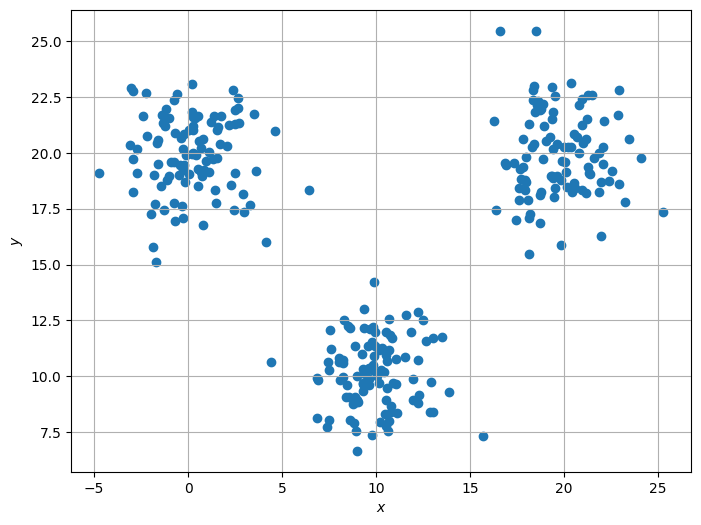

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [8]:
# Aplicar clustering jerarquico

z= hierarchy.linkage(x,metric='euclidean', method='ward')
z


array([[1.70000000e+01, 2.00000000e+01, 5.56973012e-02, 2.00000000e+00],
       [2.08000000e+02, 2.48000000e+02, 6.14203420e-02, 2.00000000e+00],
       [2.19000000e+02, 2.71000000e+02, 6.61431212e-02, 2.00000000e+00],
       ...,
       [5.88000000e+02, 5.92000000e+02, 2.10156233e+01, 1.00000000e+02],
       [5.94000000e+02, 5.96000000e+02, 1.37886762e+02, 2.00000000e+02],
       [5.95000000e+02, 5.97000000e+02, 1.79228503e+02, 3.00000000e+02]],
      shape=(299, 4))

In [9]:
df_z= pd.DataFrame(z)
df_z

,0,1,2,3
0,17.0,20.0,0.055697,2.0
1,208.0,248.0,0.061420,2.0
2,219.0,271.0,0.066143,2.0
3,120.0,134.0,0.073424,2.0
4,63.0,85.0,0.079456,2.0
...,...,...,...,...
294,590.0,591.0,17.906409,100.0
295,589.0,593.0,20.778306,100.0
296,588.0,592.0,21.015623,100.0
297,594.0,596.0,137.886762,200.0


## Criterios de selección de grupos


In [ ]:
# Criterio del dendrograma


## Otros criterios de selección

### Criterio del Codo (1er criterio)


In [ ]:
# Gráfica del codo


In [ ]:
# Graficar critero del codo


In [ ]:
# Función que gener y grafique el criterio del codo


### Criterio del gradiente


In [ ]:
# Función que gener y grafique el criterio del gradiente


## Aplicar número de grupos opt

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [ ]:
# Clustering Jerárquico


In [ ]:
#Dendrograma


In [ ]:
# 2do criterio (criterio del codo)


In [ ]:
# 3er criterio (criterio del gradiente)
